# Pythonでヒストグラムを作ろう！日本の宿泊料金データ分析

## はじめに

こんにちは！このページでは、Pythonを使ってヒストグラム（"Histogram"）を作成する方法を学びます。ヒストグラムは、データの分布を視覚化するのに適した図表です。今回は、日本の主要観光地の宿泊料金データを例に、ヒストグラムの作り方を step by step で説明していきます。

## ヒストグラムとは

ヒストグラムは、数値データの分布を棒グラフで表現したものです。データを一定の範囲（ビン）に区切り、各範囲に含まれるデータの数を棒の高さで表します。これにより、データの集中具合や偏りを視覚的に把握できます。

ヒストグラムの特徴：
1. データの分布形状を視覚化できる
2. 中央値、最頻値、外れ値などを直感的に理解できる
3. データの偏りや集中度を把握できる
4. 複数のデータセットを比較しやすい

## データの準備

まずは、分析に使うデータを準備しましょう。今回は、日本の主要観光地の宿泊料金データを使用します。


In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# フォントの設定（日本語表示のため）
plt.rcParams['font.family'] = 'Hiragino Sans'  # Macの場合
# plt.rcParams['font.family'] = 'Yu Gothic'  # Windowsの場合

# データの作成
np.random.seed(42)  # 再現性のため乱数シードを設定

areas = ['沖縄', '東京', '北海道', '京都', '大阪']
hotel_types = ['リゾートホテル', '旅館', 'ビジネスホテル']

data = []
for area in areas:
    for hotel_type in hotel_types:
        if area == '沖縄':
            base_price = 18000
        elif area == '東京':
            base_price = 15000
        elif area == '北海道':
            base_price = 13000
        elif area == '京都':
            base_price = 12000
        else:  # 大阪
            base_price = 10000
        
        if hotel_type == 'リゾートホテル':
            prices = np.random.normal(base_price * 1.5, base_price * 0.3, 50)
        elif hotel_type == '旅館':
            prices = np.random.normal(base_price * 1.2, base_price * 0.25, 50)
        else:  # ビジネスホテル
            prices = np.random.normal(base_price * 0.7, base_price * 0.15, 50)
        
        for price in prices:
            data.append([area, hotel_type, max(0, int(price))])  # 負の値を0に

df = pd.DataFrame(data, columns=['エリア', 'ホテルタイプ', '宿泊料金'])

print(df.head())
print(f"データの形状: {df.shape}")


  エリア   ホテルタイプ   宿泊料金
0  沖縄  リゾートホテル  29682
1  沖縄  リゾートホテル  26253
2  沖縄  リゾートホテル  30497
3  沖縄  リゾートホテル  35224
4  沖縄  リゾートホテル  25735
データの形状: (750, 3)


このコードの詳細説明：
1. 各エリアに基本価格（base_price）を設定します。これにより、エリア間の価格差を表現します。
2. ホテルタイプごとに基本価格を調整し、現実的な価格分布を生成します。
3. np.random.normal()を使用して、正規分布に従う価格データを生成します。
4. 生成したデータをDataFrameに変換し、最初の5行と全体の形状を表示して確認します。

## 基本的なヒストグラムの作成

次に、基本的なヒストグラムを作成します。


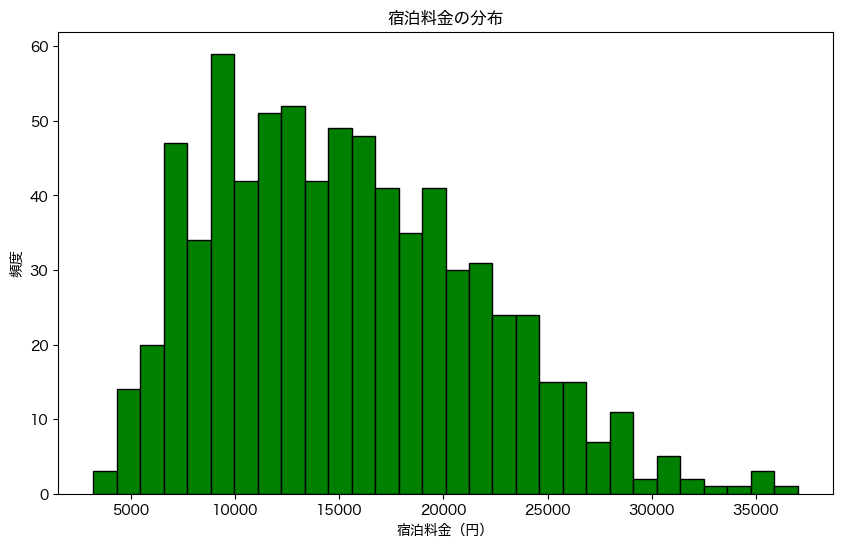

最小値: 3207, 最大値: 37002


In [130]:
# 基本的なヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(df['宿泊料金'], bins=30, color='green', edgecolor='black')
plt.title('宿泊料金の分布')
plt.xlabel('宿泊料金（円）')
plt.ylabel('頻度')
plt.savefig('histogram_basic.png')
plt.show()

print(f"最小値: {df['宿泊料金'].min()}, 最大値: {df['宿泊料金'].max()}")


このコードの詳細説明：
1. `plt.figure(figsize=(10, 6))`でグラフのサイズを設定します。
2. `plt.hist()`関数を使用してヒストグラムを作成します。`bins=30`でビンの数を30に設定しています。
3. `plt.title()`, `plt.xlabel()`, `plt.ylabel()`でグラフのタイトルと軸ラベルを設定します。
4. `plt.savefig()`でグラフを画像として保存します。
5. `plt.close()`でグラフをクリアし、メモリを解放します。
6. データの最小値と最大値を表示して、分布の範囲を確認します。

## エリア別のヒストグラム比較

日本の主要観光地別にデータを分けて、ヒストグラムを比較してみましょう。


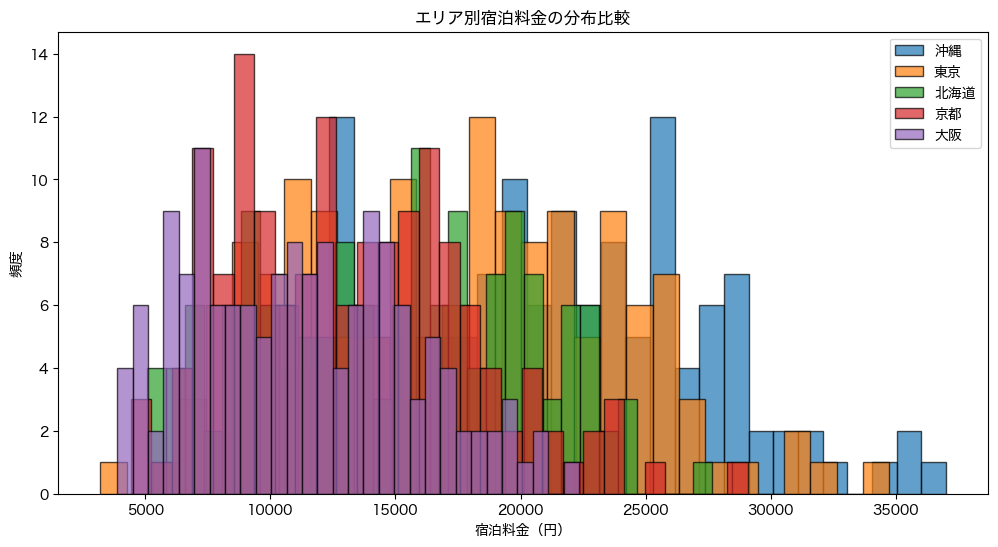

In [117]:
# エリア別のヒストグラム
plt.figure(figsize=(12, 6))
for area in areas:
    plt.hist(df[df['エリア'] == area]['宿泊料金'], bins=30, alpha=0.7, edgecolor='black', label=area)

plt.title('エリア別宿泊料金の分布比較')
plt.xlabel('宿泊料金（円）')
plt.ylabel('頻度')
plt.legend()
plt.savefig('histogram_areas.png')
plt.show()

このコードの詳細説明：
1. `plt.figure(figsize=(12, 6))`で大きめのグラフサイズを設定します。
2. `for`ループを使用して、各エリアのデータを別々のヒストグラムとして描画します。
3. `alpha=0.5`で透明度を設定し、重なり合った部分も見えるようにします。
4. `label=area`で各ヒストグラムにラベルを付けます。
5. `plt.legend()`で凡例を表示し、どの色がどのエリアを表しているかを示します。
6. グラフを保存し、クリアします。

## ホテルタイプ別のヒストグラム比較

ホテルタイプ別にデータを分けて、ヒストグラムを比較してみましょう。


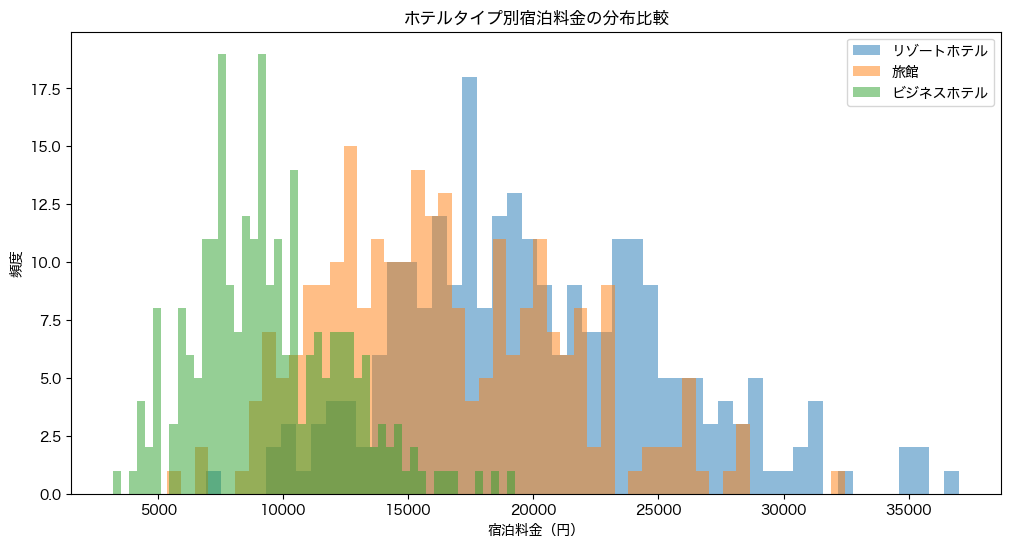

In [118]:
# ホテルタイプ別のヒストグラム
plt.figure(figsize=(12, 6))
for hotel_type in hotel_types:
    plt.hist(df[df['ホテルタイプ'] == hotel_type]['宿泊料金'], bins=50, alpha=0.5, label=hotel_type)

plt.title('ホテルタイプ別宿泊料金の分布比較')
plt.xlabel('宿泊料金（円）')
plt.ylabel('頻度')
plt.legend()
plt.savefig('histogram_hotel_types.png')
plt.show()


このコードの詳細説明：
1. エリア別のヒストグラム比較と同様の手順で、ホテルタイプ別のヒストグラムを作成します。
2. 各ホテルタイプのデータを別々のヒストグラムとして描画し、重ね合わせて表示します。
3. これにより、ホテルタイプによる宿泊料金の分布の違いを視覚的に比較できます。

## まとめ

このページでは、Pythonを使って日本の主要観光地の宿泊料金データからヒストグラムを作成する方法を学びました。ヒストグラムは、データの分布を視覚化するのに適しており、以下のような特徴があります：

1. データの集中傾向や外れ値を視覚的に把握できる
2. ビンの数を調整することで、データの詳細度を変更できる
3. 複数のデータセットを重ねて比較できる

ヒストグラムは、宿泊料金データの分析において以下のような場面で活用できます：
- エリア別の宿泊料金の分布を比較し、地域間の価格差を理解する
- ホテルタイプ別の価格帯を把握し、ターゲット顧客層を検討する
- 全体の価格分布を確認し、適切な価格設定の参考にする

今回の例では、以下の点が観察できます：
1. エリアによって宿泊料金の分布が異なること
2. ホテルタイプごとに特徴的な価格帯があること
3. 全体的な宿泊料金の分布傾向

これらの観察結果を基に、マーケティング戦略の立案や価格設定の最適化などに活用できます。

ぜひ、自分の興味のある観光データでヒストグラムを作成してみてください。データの分布を視覚化することで、新たな発見があるかもしれません！

注意点：このコードでは、`plt.show()`の代わりに`plt.savefig()`を使用してグラフを画像として保存しています。これにより、表示の問題を回避し、グラフを後で確認することができます。実際に使用する際は、保存したグラフ画像を確認してください。

問題1
あなたは、最近1ヶ月間の毎日の歩数を記録しました。このデータを使って、歩数分布のヒストグラムを作成してください。

データ：
歩数 = [5023, 7512, 6089, 8245, 9102, 6734, 7890, 5678, 8901, 7345, 6789, 9234, 8123, 7456, 6543, 8765, 7654, 6543, 9012, 8234, 7123, 6789, 8901, 7345, 6234, 8567, 7890, 6123, 9345, 8234]

以下の要件を満たすヒストグラムを作成してください：
1. グラフのタイトルを「1ヶ月間の歩数分布」とする
2. x軸のラベルを「歩数」、y軸のラベルを「日数」とする
3. ビンの数を10に設定する
4. グラフの色を水色にする

解答例(Pythonコード):


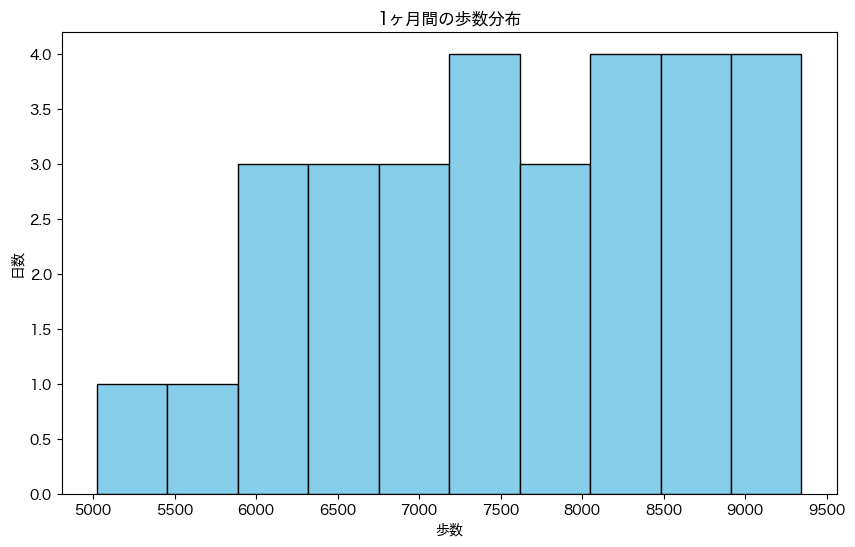

平均歩数: 7581
最小歩数: 5023
最大歩数: 9345


In [125]:
import matplotlib.pyplot as plt
import numpy as np

# フォントの設定（日本語表示のため）
plt.rcParams['font.family'] = 'Hiragino Sans'  # Macの場合
# plt.rcParams['font.family'] = 'Yu Gothic'  # Windowsの場合

# データの準備
歩数 = [5023, 7512, 6089, 8245, 9102, 6734, 7890, 5678, 8901, 7345, 6789, 9234, 8123, 7456, 6543, 8765, 7654, 6543, 9012, 8234, 7123, 6789, 8901, 7345, 6234, 8567, 7890, 6123, 9345, 8234]

# ヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(歩数, bins=10, color='skyblue', edgecolor='black')
plt.title('1ヶ月間の歩数分布')
plt.xlabel('歩数')
plt.ylabel('日数')

# x軸の目盛りを整数に設定(補足)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

# データの基本統計量を表示
print(f"平均歩数: {np.mean(歩数):.0f}")
print(f"最小歩数: {np.min(歩数)}")
print(f"最大歩数: {np.max(歩数)}")


解説:
1. まず、必要なライブラリ（matplotlib.pyplot と numpy）をインポートします。
2. 日本語フォントを設定して、グラフ上の文字が正しく表示されるようにします。
3. 提供された歩数データをリストとして定義します。
4. `plt.figure(figsize=(10, 6))` でグラフのサイズを設定します。
5. `plt.hist()` 関数を使ってヒストグラムを作成します。`bins=10` でビンの数を10に、`color='skyblue'` で色を水色に設定しています。
6. `plt.title()`, `plt.xlabel()`, `plt.ylabel()` でグラフのタイトルと軸ラベルを設定します。
7. x軸の目盛りを整数に設定するために、`plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))` を使用します。
8. `plt.show()` でグラフを表示します。
9. 最後に、NumPyの関数を使って、データの基本的な統計量（平均、最小値、最大値）を計算し表示しています。

このヒストグラムを見ることで、1ヶ月間の歩数の分布状況を視覚的に理解することができます。



問題2
あなたは、クラスの生徒たちの1学期の国語のテスト結果を集計しました。このデータを使って、テスト結果の分布を表すヒストグラムを作成してください。

データ：
点数 = [65, 72, 88, 95, 78, 83, 69, 91, 77, 85, 80, 93, 68, 74, 89, 82, 76, 87, 79, 92, 71, 86, 84, 90, 75, 81, 73, 94, 70, 88]

以下の要件を満たすヒストグラムを作成してください：
1. グラフのタイトルを「国語テストの点数分布」とする
2. x軸のラベルを「点数」、y軸のラベルを「生徒数」とする
3. ビンの数を8に設定する
4. グラフの色をピンク色にする
5. 平均点を赤い縦線で表示する

解答例(Pythonコード):


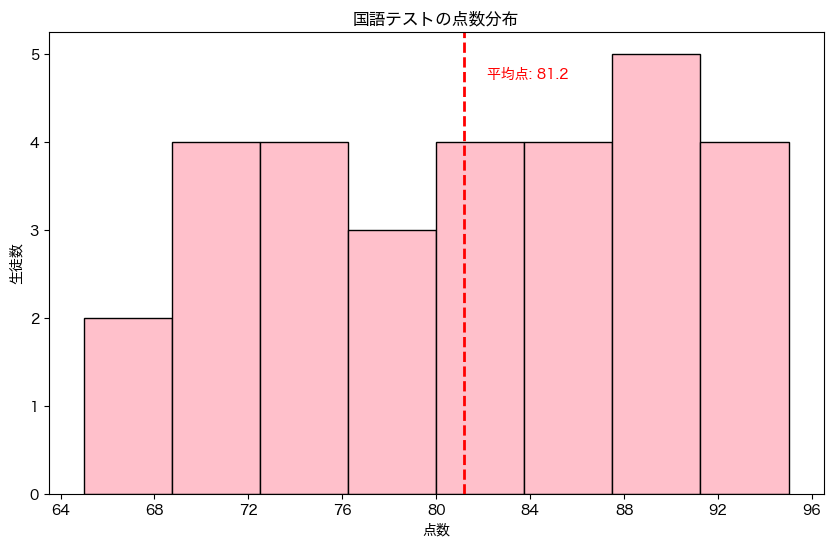

平均点: 81.2
最低点: 65
最高点: 95


In [126]:
import matplotlib.pyplot as plt
import numpy as np

# フォントの設定（日本語表示のため）
plt.rcParams['font.family'] = 'Hiragino Sans'  # Macの場合
# plt.rcParams['font.family'] = 'Yu Gothic'  # Windowsの場合

# データの準備
点数 = [65, 72, 88, 95, 78, 83, 69, 91, 77, 85, 80, 93, 68, 74, 89, 82, 76, 87, 79, 92, 71, 86, 84, 90, 75, 81, 73, 94, 70, 88]

# 平均点の計算
平均点 = np.mean(点数)

# ヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(点数, bins=8, color='pink', edgecolor='black')
plt.title('国語テストの点数分布')
plt.xlabel('点数')
plt.ylabel('生徒数')

# 平均点を赤い縦線で表示
plt.axvline(平均点, color='red', linestyle='dashed', linewidth=2)
plt.text(平均点+1, plt.ylim()[1]*0.9, f'平均点: {平均点:.1f}', color='red')

# x軸の目盛りを整数に設定
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

# データの基本統計量を表示
print(f"平均点: {平均点:.1f}")
print(f"最低点: {np.min(点数)}")
print(f"最高点: {np.max(点数)}")


解説:
1. 必要なライブラリ（matplotlib.pyplot と numpy）をインポートします。
2. 日本語フォントを設定して、グラフ上の文字が正しく表示されるようにします。
3. 提供されたテスト結果のデータをリストとして定義します。
4. `np.mean()` 関数を使って平均点を計算します。
5. `plt.figure(figsize=(10, 6))` でグラフのサイズを設定します。
6. `plt.hist()` 関数を使ってヒストグラムを作成します。`bins=8` でビンの数を8に、`color='pink'` で色をピンク色に設定しています。
7. `plt.title()`, `plt.xlabel()`, `plt.ylabel()` でグラフのタイトルと軸ラベルを設定します。
8. `plt.axvline()` 関数を使って平均点を示す赤い縦線を追加します。
9. `plt.text()` 関数を使って平均点の値をグラフ上に表示します。
10. x軸の目盛りを整数に設定するために、`plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))` を使用します。
11. `plt.show()` でグラフを表示します。
12. 最後に、データの基本的な統計量（平均点、最低点、最高点）を計算し表示しています。

このヒストグラムを見ることで、クラスの国語テストの点数分布と平均点を視覚的に理解することができます。点数の集中している範囲や、平均点との関係などを簡単に把握できます。
